# Eve Crafts


### Project Overview

Welcome to the DIY Craft and Hobby Marketplace project! In this project, we will be integrating artificial intelligence into our platform to enhance user experience and engagement. Your role will involve developing AI-powered features to personalize recommendations, improve search functionality, and streamline user interactions. Let's dive into the exciting world of AI and revolutionize the way craft enthusiasts discover and interact with handmade creations.

There are two datsets used in this project and they are the Etsy Shop datasets. We will use techniques such as Natural Language Processing, Content-Based Filtering and Collaborative Filtering to develop, train and test our Machine Learning Model.

### Framework

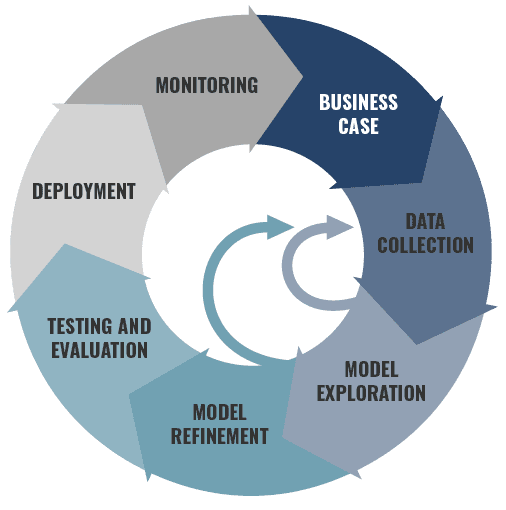

### Data Pre-Processing and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('etsy_shops.csv')
df2 = pd.read_csv('shops.csv')

In [3]:
df2.head()

,url,name,price,currency,availability,description,category,brand,average_rating,reviews_count,images,product_details,scraped_at
0,https://www.etsy.com/in-en/listing/737734447/s...,Satin Harry Potter Bachelorette Sash - Bachelo...,12.00,USD,InStock,Bachelorette Sash - Bachelorette Party - Bride...,Weddings < Accessories < Belts & Sashes,LLDgiftsByLaurenLash,4.8854,19128,https://i.etsystatic.com/6641405/r/il/ec95ad/1...,Handmade\n\n\n\n\n\nMaterials: SATIN,2021-10-03 02:45:53
1,https://www.etsy.com/in-en/listing/162621679/b...,Bridal peacock hair accessories &quot;Liana&quot;,25.00,USD,InStock,This beautiful hair piece is made with peacock...,Weddings < Accessories < Hair Accessories,DressMyWedding,4.9296,2087,https://i.etsystatic.com/6366229/r/il/09fd83/5...,Handmade,2021-10-03 02:45:53
2,https://www.etsy.com/in-en/listing/260700655/b...,Baby Burp Cloths - Baby Girl Burp Cloths - Pin...,13.00,USD,InStock,This pink and gold burp cloth set is perfect f...,Bath & Beauty < Baby & Child Care < Bibs & Bur...,BobbleKottzBoutique,5.0000,544,https://i.etsystatic.com/11300307/r/il/840a49/...,"Handmade\n\n\n\n\n\nMaterials: Cotton, Chenill...",2021-10-03 02:45:53
3,https://www.etsy.com/in-en/listing/508832094/2...,"2pcs Bridal hair pins, pearl hair pins, golden...",36.15,USD,InStock,This hair pins are made using fabric pink flow...,Weddings < Accessories < Hair Accessories < Ha...,BridesDiary,4.9412,253,https://i.etsystatic.com/13662612/r/il/aeb9e4/...,"Handmade\n\n\n\n\n\nMaterials: white pearls, t...",2021-10-03 02:45:53
4,https://www.etsy.com/in-en/listing/872492912/p...,Pink Satin Ballerina Slippers Baby Ballet Shoe...,33.33,USD,InStock,READY TO SHIP TODAY!\n\nS shoe size 7-8 (age 2...,Shoes < Girls' Shoes < Costume Shoes,FairytaleTutusDesign,4.8301,251,https://i.etsystatic.com/11475047/r/il/0d86f8/...,Handmade,2021-10-03 02:45:54


In [4]:
df1.head()

,seller_location,seller_join_date,number_of_sales,number_of_reviews,average_review_score,number_of_items
0,"Jaipur, India",2018,0,NaN,NaN,2
1,NaN,2017,226,12.0,5.0,3
2,"Soorts-Hossegor, France",2017,14,2.0,4.0,0
3,NaN,2019,0,NaN,NaN,2
4,NaN,2019,0,NaN,NaN,9


In [5]:
df1["number_of_reviews"].fillna(0, inplace=True)
df1["average_review_score"].fillna(df1["average_review_score"].mean(), inplace=True)

In [6]:
df1.head()

,seller_location,seller_join_date,number_of_sales,number_of_reviews,average_review_score,number_of_items
0,"Jaipur, India",2018,0,0.0,4.897582,2
1,NaN,2017,226,12.0,5.000000,3
2,"Soorts-Hossegor, France",2017,14,2.0,4.000000,0
3,NaN,2019,0,0.0,4.897582,2
4,NaN,2019,0,0.0,4.897582,9


In [7]:
copy_shops_data = df1.fillna(0)

In [8]:
copy_shops_data.head()

,seller_location,seller_join_date,number_of_sales,number_of_reviews,average_review_score,number_of_items
0,"Jaipur, India",2018,0,0.0,4.897582,2
1,0,2017,226,12.0,5.000000,3
2,"Soorts-Hossegor, France",2017,14,2.0,4.000000,0
3,0,2019,0,0.0,4.897582,2
4,0,2019,0,0.0,4.897582,9


### Feature Extraction

In [9]:
copy_shops_data["years_in_business"] = 2020 - copy_shops_data["seller_join_date"]

In [10]:
copy_shops_data["average_sales_per_year"] = copy_shops_data["number_of_sales"] / (2020 - copy_shops_data
                                                                                  ["seller_join_date"])

In [11]:
copy_shops_data["average_sales_per_year"]

0          0.000000
1         75.333333
2          4.666667
3          0.000000
4          0.000000
            ...    
414052     4.000000
414053     8.000000
414054     9.000000
414055    15.000000
414056     0.000000
Name: average_sales_per_year, Length: 414057, dtype: float64

In [12]:
copy_shops_data["review_sale_ratio"] = copy_shops_data["number_of_reviews"] / copy_shops_data["number_of_sales"]
copy_shops_data["review_sale_ratio"]

0              NaN
1         0.053097
2         0.142857
3              NaN
4              NaN
            ...   
414052    0.250000
414053    0.125000
414054    0.074074
414055    0.000000
414056         NaN
Name: review_sale_ratio, Length: 414057, dtype: float64

In [13]:
copy_shops_data["review_sale_ratio"].fillna(0, inplace=True)
copy_shops_data["review_sale_ratio"]

0         0.000000
1         0.053097
2         0.142857
3         0.000000
4         0.000000
            ...   
414052    0.250000
414053    0.125000
414054    0.074074
414055    0.000000
414056    0.000000
Name: review_sale_ratio, Length: 414057, dtype: float64

In [14]:
copy_shops_data["review_sale_ratio"] = copy_shops_data["review_sale_ratio"].map(lambda x: 0 if x == float("inf") else x)

#### Finding The Most Predictive Features

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
X = copy_shops_data.drop(["seller_location", "average_sales_per_year"], axis=1)
y = copy_shops_data["average_sales_per_year"]

#### Removing Highly Correlated Columns

<Axes: >

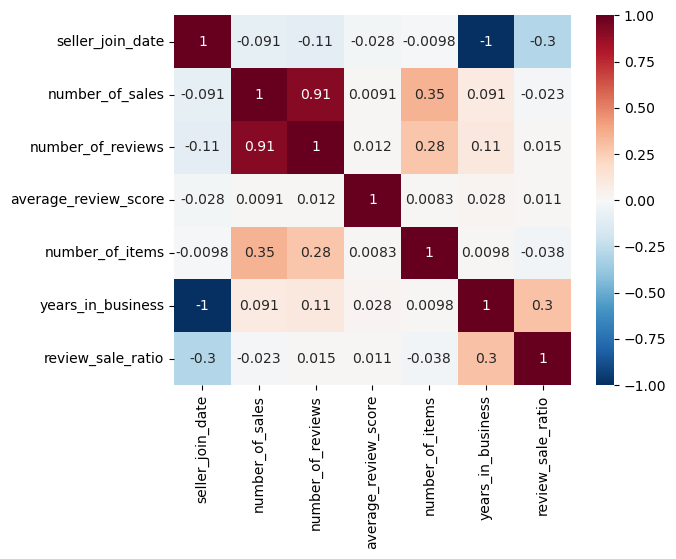

In [17]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap="RdBu_r")

In [18]:
high_corr_cols = set()

# Loop over bottom diagonal of correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        # Print variables with high correlation
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])

number_of_reviews number_of_sales 0.9077607223880803
years_in_business seller_join_date -1.0000000000000016


In [19]:
X = X.drop(["number_of_sales", "seller_join_date"], axis=1)

<Axes: >

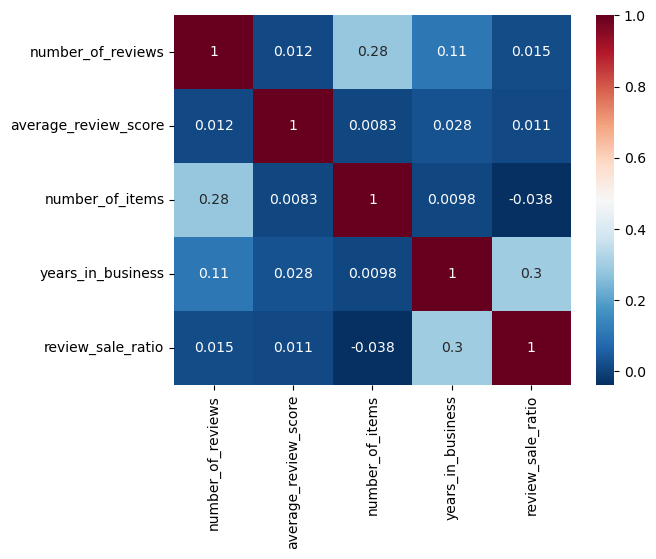

In [20]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap="RdBu_r")

#### Use Mutual Information to Identify Predictors

In [21]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X, y)

In [22]:
mi_series = pd.Series(mutual_info, index=[X.columns])
print(mi_series)

number_of_reviews       0.878680
average_review_score    0.352404
number_of_items         0.246946
years_in_business       1.256337
review_sale_ratio       1.717937
dtype: float64


### Model Development and Training

In [23]:
#Scale and Normalize Data
X.describe()

,number_of_reviews,average_review_score,number_of_items,years_in_business,review_sale_ratio
count,414057.000000,414057.000000,414057.000000,414057.000000,414057.000000
mean,121.555421,4.897582,45.343909,5.488964,0.258059
std,971.227998,0.274524,231.310836,3.274972,0.224274
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,4.897582,0.000000,3.000000,0.103448
50%,8.000000,4.897582,6.000000,5.000000,0.220395
75%,39.000000,5.000000,31.000000,8.000000,0.351562
max,184489.000000,5.000000,78611.000000,51.000000,4.000000


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
std_X.describe()

,number_of_reviews,average_review_score,number_of_items,years_in_business,review_sale_ratio
count,4.140570e+05,4.140570e+05,4.140570e+05,4.140570e+05,4.140570e+05
mean,-2.608397e-18,-1.475735e-15,-3.432101e-19,-3.294817e-17,7.632993e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.251566e-01,-1.419763e+01,-1.960304e-01,-1.370689e+00,-1.150645e+00
25%,-1.241269e-01,0.000000e+00,-1.960304e-01,-7.599964e-01,-6.893857e-01
50%,-1.169196e-01,0.000000e+00,-1.700913e-01,-1.493035e-01,-1.679397e-01
75%,-8.500117e-02,3.730764e-01,-6.201148e-02,7.667360e-01,4.169169e-01
max,1.898294e+02,3.730764e-01,3.396544e+02,1.389663e+01,1.668473e+01


In [25]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(std_X, y, test_size=0.2)

In [26]:
print(len(X_train), len(X_test))

331245 82812


### Demographic Filtering

Before getting started with this -

- We need a metric to score or rate a product
- Calculate the score for every product
- Sort the scores and recommend the best rated product to the customers.

We can use the average ratings of the product as the score but using this won't be fair enough since a product with 8.9 average rating and only 100 reviews cannot be considered better than the product with 7.8 as as average rating but 1000 reviews.

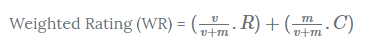

where,

- v is the number of reviews for the product;
- m is the minimum reviews required to be listed in the chart;
- R is the average rating of the product; And
- C is the mean reviews across the whole report

In [27]:
C= df2['average_rating'].mean()
C

4.8569980107630215

So, the mean rating for all the products is approx 4.8 on a scale of 10.The next step is to determine an appropriate value for m, the minimum reviews required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a product to feature in the charts, it must have more reviews than at least 90% of the products in the list.

In [28]:
m= df2['reviews_count'].quantile(0.9)
m

4640.0

Now, we filter out thr products that qualify for the chart.

In [29]:
q_products = df2.copy().loc[df2['reviews_count'] >= m]
q_products.shape

(1042, 13)

In [30]:
def weighted_rating(x, m=m, C=C):
    v = x['reviews_count']
    R = x['average_rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [31]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_products['score'] = q_products.apply(weighted_rating, axis=1)

In [32]:
#Sort movies based on score calculated above
q_products = q_products.sort_values('score', ascending=False)

#Print the top 15 movies
q_products[['name', 'average_rating', 'reviews_count', 'score']].head(15)

,name,average_rating,reviews_count,score
8485,Cat Bath Print - Gut Wash - Bathroom Art - Cat...,4.9969,8751,4.948424
745,Marshmallow Cat Print - S&#39;more Cat Print- ...,4.9969,8751,4.948424
2304,Small Bow and Arrows - &quot;Copyright From Je...,4.9828,11423,4.946461
9100,Black cat with foliage A4 art print,4.9933,8681,4.945823
1190,Vintage Swing Coat pdf Pattern for Blythe Dolls,4.9638,22165,4.945312
8921,Sparkle Starlet Doll pattern,4.9638,22165,4.945312
4846,Personalized Wedding Champagne Flutes - Set of 2,4.9890,8838,4.943556
1236,Father&#39;s Day Fishing Lure - Personalized F...,4.9890,8838,4.943556
1850,Springer Spaniel Art Print - Spring Break - Fu...,4.9854,9416,4.943013
214,Sheltie Art Print - Right Behind You - Shetlan...,4.9854,9416,4.943013


Text(0.5, 1.0, 'Most Famous Products')

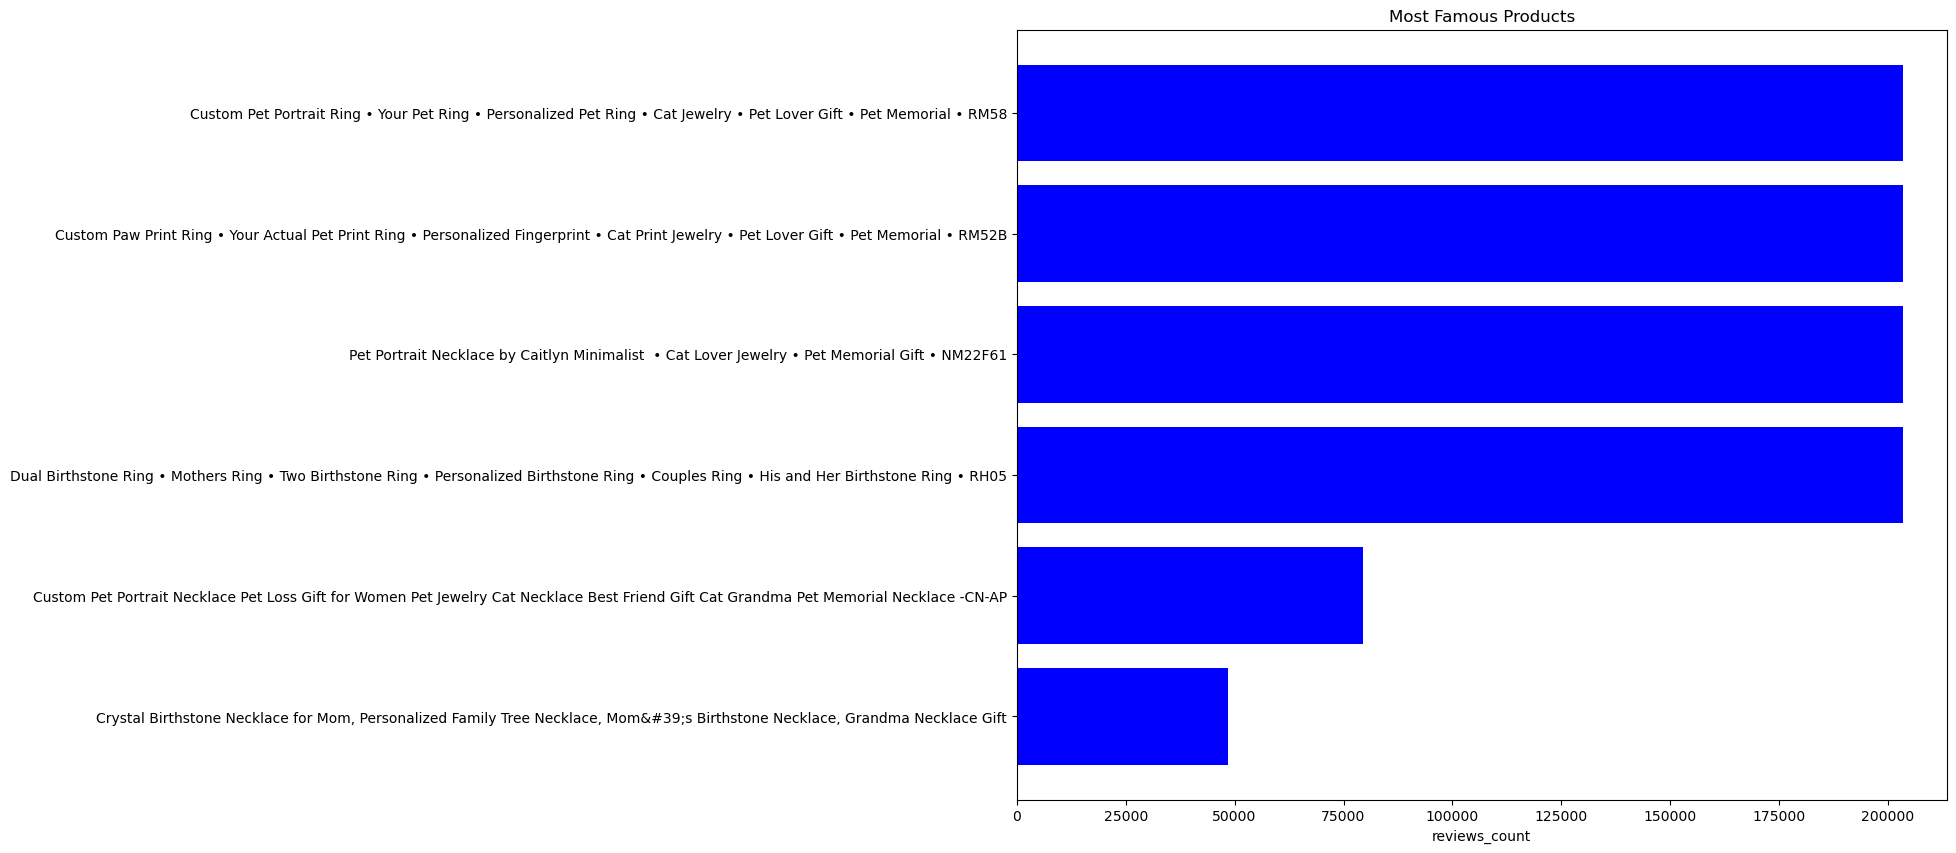

In [33]:
pop= df2.sort_values('reviews_count', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))

plt.barh(pop['name'].head(6),pop['reviews_count'].head(6), align='center',
        color='blue')
plt.gca().invert_yaxis()
plt.xlabel("reviews_count")
plt.title("Most Famous Products")

We have now experimented on our model using the Demographic Filtering Technique. However we need to keep in mind that Demographic Filtering is general technique that doesn't pay too much attention to the specific interests and taste of consumers. For this, we move on to a more refined and efficient technique - Content Based Filtering

### Content Based Filtering

In this recommender system the content of the product (description, category, name, product details, etc) is used to find its similarity with other handmade products. Then the products that are most likely to be similar are recommended.

#### Plot Description Based Recommender

We will compute pairwise similarity scores for all prdocts based on their descriptions and recommend products based on that similarity score. The plot description is given in the description feature of our dataset. Let's take a look at the data.

In [34]:
df2['description'].head()

0    Bachelorette Sash - Bachelorette Party - Bride...
1    This beautiful hair piece is made with peacock...
2    This pink and gold burp cloth set is perfect f...
3    This hair pins are made using fabric pink flow...
4    READY TO SHIP TODAY!\n\nS shoe size 7-8 (age 2...
Name: description, dtype: object

We need to convert the word vector of each description. Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each description.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as (term instances/total instances). Inverse Document Frequency is the relative count of documents containing the term is given as log(number of documents/documents with term) The overall importance of each word to the documents in which they appear is equal to TF * IDF

This will give you a matrix where each column represents a word in the description vocabulary (all the words that appear in at least one document) and each row represents a product, as before. This is done to reduce the importance of words that occur frequently in the descriptions and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines.

In [35]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['description'] = df2['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(10406, 32009)

We see that over 32,000 different words were used to describe the products in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two products. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

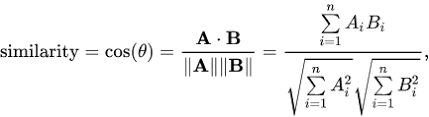

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [36]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function that takes in a product name as an input and outputs a list of the 10 most similar products. Firstly, for this, we need a reverse mapping of product names and DataFrame indices. In other words, we need a mechanism to identify the index of a product in our metadata DataFrame, given its name.

In [37]:
#Construct a reverse map of indices and product names
indices = pd.Series(df2.index, index=df2['name']).drop_duplicates()

We are now in a good position to define our recommendation function. These are the following steps we'll follow :-

- Get the index of the product given its name.
- Get the list of cosine similarity scores for that particular product with the rest of the products. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
- Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
- Get the top 10 elements of this list. Ignore the first element as it refers to self (the product most similar to a particular product is the product itself).
- Return the titles corresponding to the indices of the top elements.

In [38]:
# Function that takes in product name as input and outputs most similar products
def get_recommendations(name, cosine_sim=cosine_sim):
    # Get the index of the product that matches the name
    idx = indices[name]

    # Get the pairwise similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the product based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar product
    sim_scores = sim_scores[1:11]

    # Get the product indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar products
    return df2['name'].iloc[movie_indices]

In [39]:
get_recommendations('Bridal peacock hair accessories &quot;Liana&quot;')

2829     Bridal  feather hair clip, peacock white feath...
1545     Peacock bridal bouquet, teal, purple, blue bri...
2598     Peacock Boutonniere, teal and purple feather b...
6663     Peacock, peacock wedding,boho, boho chic, goss...
9788     Peacock wedding hair accessories, feather fasc...
5510     Pair Of Beautiful a peacock Shoe Clip pair wit...
8290     Gold Groom boutonniere Ostrich Feather Bridal ...
5631     Turquoise Blue Peacock Feather Hair Clip Cryst...
10204    Plum and yellow calla lily bridal bouquet, pea...
6087     Lime green Hydrangea bouquet purple and peacoc...
Name: name, dtype: object

In [40]:
get_recommendations('2pcs Bridal hair pins, pearl hair pins, golden color hair pins with pink flowers')

1591     1pcs Bridal hair pins, pearl hair pins, golden...
4884     1pcs Bridal hair pins, pearl hair pins, golden...
1503     1pcs Bridal hair pins, rhinestones hair pins, ...
8804     1pc Bridal hair pin, Pearl Hair pin, gold hair...
9884     Wedding hair jewelry, small bridal hair comb w...
546      Wedding hair jewelry, bridal hair crown, golde...
10353    1pcs Bridal hair pin, pearl hair pins, silver ...
3440     Wedding hair jewelry, pearls and crystals brid...
7456     Pearls and Leaves Bridal Wreath, golden weddin...
1858     Choice color: Delicate wedding hair jewelry, p...
Name: name, dtype: object

While our system has done a decent job of finding products with similar descriptions, the quality of recommendations is not that great. "Bridal peacock hair accessories &quot;Liana&quot;" returns all Bridal products while it is more likely that the people who liked that product are more inclined to enjoy other products by LLDgiftsByLaurenLash brand. This is something that cannot be captured by the present system.

#### Categories, Brands and Product Details Based Recommender

t goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what we are going to do in this section. We are going to build a recommender based on the following metadata: the 3 top brands, the categories, related product details and the product description keywords.

We need to extract the three most important brands, the category and the details associated with that product. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure.

In [41]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

In [42]:
# Get the product's name from the brand feature. If brand is not listed, return NaN
def get_brand(x):
    for i in x:
        if df2['brand'] == 'BridesDiary':
            return i['name']
    return np.nan

In [43]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [44]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [45]:
# Apply clean_data function to your features.
features = ['brand', 'category', 'product_details']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

We are now in a position to create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer.

In [46]:
def create_soup(x):
    return ' '.join(x['brand']) + ' ' + ' '.join(x['category']) + ' ' + (x['product_details'])
df2['soup'] = df2.apply(create_soup, axis=1)

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the CountVectorizer() instead of TF-IDF. 

In [47]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [48]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [49]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['name'])

In [50]:
get_recommendations('Bridal peacock hair accessories &quot;Liana&quot;', cosine_sim2)

4     Pink Satin Ballerina Slippers Baby Ballet Shoe...
7     Brooch Bouquet, Red Brooch Bouquet, Red Bouque...
14                    Crochet dancers and canopy drinks
16    Baby leather sheepskin boots by BAMBOSHE &#39;...
18    Married AF with Silver Ring image bridal showe...
22    Glitter wedding veil glitter bridal veil spark...
25    Caleb style design. Dummy clip. Personalised  ...
27    Tie, navy blue tie, Navy blue floral tie, wedd...
28    Baby Girl Velvet Bow Headband, Baby bow headwr...
36    Wedding Bouquet,17 piece set Bridal bouquet,TE...
Name: name, dtype: object

In [51]:
get_recommendations('digital backdrop - newborn photography - flower nest', cosine_sim2)

21      Newborn Digital Backdrop, Vintage Bears Backdr...
475     Electronic Save The Date, Electronic Invitatio...
483     Cake Smash Digital Backdrop Baby Boy Navy Blue...
606     Newborn Digital Backdrop  Girl Baby Princess C...
965     Pet Portrait, Custom Pet Portrait, Pet Memoria...
1593    Custom gift of painted photo, Digital illustra...
1791    Wedding Flowers Bouquet Preservation ,Wedding ...
2461    Newborn Digital Backdrop, Christmas Digital Ba...
3124    Wedding Place Card Printable, Place Card Templ...
4100    DIGITAL Nest Prop, Newborn Nest Digital, Newbo...
Name: name, dtype: object

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. It is more likely that consumers who like products belonging to the Wedding category will also be interested in products related to the Bath & Beauty category and Children sub-category. Therefore, to our features above we can add an Age feature. We can also increase the weight of the brand, by adding the feature multiple times in the soup.

### Collaborative Filtering

Our content based engine suffers from some severe limitations. It is only capable of suggesting products which are close to a specific product. That is, it is not capable of capturing tastes and providing recommendations across categories.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a product will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers. It is basically of two types:-



- User based filtering- These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity. This filtering technique can be illustrated with an example. In the following matrixes, each row represents a user, while the columns correspond to different movies except the last one which records the similarity between that user and the target user. Each cell represents the rating that the user gives to that product. 

- Item Based Collaborative Filtering - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does.

It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. However, several problems remain for this method. First, the main issue is scalability. The computation grows with both the customer and the product. The worst case complexity is O(mn) with m users and n items. In addition, sparsity is another concern. Take a look at the above table again. Although there is only one user that rated both Matrix and Titanic rated, the similarity between them is 1. In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.

#### Single Value Decomposition

One way to handle the scalability and sparsity issue created by CF is to leverage a latent factor model to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). The lower the RMSE, the better the performance.

Now talking about latent factor you might be wondering what is it ?It is a broad idea which describes a property or concept that a user or an item have. For instance, for music, latent factor can refer to the genre that the music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable.

Let's see how to implement this. Since the dataset we used before did not have userId(which is necessary for collaborative filtering) let's load another dataset. We'll be using the Surprise library to implement SVD.

In [52]:
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import cross_validate

In [53]:
reader = Reader()
data = Dataset.load_from_df(df2[['name', 'price', 'average_rating']], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2178  0.2191  0.2150  0.2300  0.2475  0.2259  0.0120  
MAE (testset)     0.1184  0.1189  0.1177  0.1156  0.1174  0.1176  0.0012  
Fit time          0.08    0.07    0.07    0.07    0.07    0.07    0.01    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


{'test_rmse': array([0.21779703, 0.21913094, 0.21497515, 0.23004515, 0.24749774]),
 'test_mae': array([0.1184399 , 0.11890292, 0.11771917, 0.11555369, 0.11742335]),
 'fit_time': (0.08354592323303223,
  0.07048511505126953,
  0.06870007514953613,
  0.0697641372680664,
  0.06879901885986328),
 'test_time': (0.006503105163574219,
  0.005586862564086914,
  0.005548000335693359,
  0.005651950836181641,
  0.005609989166259766)}

We get a mean Root Mean Sqaure Error of 0.22 approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [54]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Let us pick a product which has a price of 12.00 and check the ratingsof that product.

In [55]:
df2[df2['price'] == 12.00]

,index,url,name,price,currency,availability,description,category,brand,average_rating,reviews_count,images,product_details,scraped_at,soup
0,0,https://www.etsy.com/in-en/listing/737734447/s...,Satin Harry Potter Bachelorette Sash - Bachelo...,12.0,USD,InStock,Bachelorette Sash - Bachelorette Party - Bride...,weddings<accessories<belts&sashes,lldgiftsbylaurenlash,4.8854,19128,https://i.etsystatic.com/6641405/r/il/ec95ad/1...,handmade\n\n\n\n\n\nmaterials:satin,2021-10-03 02:45:53,l l d g i f t s b y l a u r e n l a s h w e d ...
81,81,https://www.etsy.com/in-en/listing/259954106/c...,Cascade Bridal Bouquet Real Touch Purple Roses...,12.0,USD,InStock,This cascade bouquet of purple Real Touch rose...,weddings<accessories<bouquets&corsages<bouquets,songsfromthegarden,4.8682,3366,https://i.etsystatic.com/5708546/r/il/444982/2...,handmade\n\n\n\n\n\nmaterials:realtouchpurpler...,2021-10-03 02:46:10,s o n g s f r o m t h e g a r d e n w e d d i ...
95,95,https://www.etsy.com/in-en/listing/985170317/s...,Senior sash with year and personalized name,12.0,USD,InStock,Order is for 1 sash:\n(Name) SENIOR Year\n3&qu...,weddings<accessories<belts&sashes,creationzbycc,4.9725,4719,https://i.etsystatic.com/12051175/r/il/d491e6/...,handmade,2021-10-03 02:46:14,c r e a t i o n z b y c c w e d d i n g s < a ...
203,203,https://www.etsy.com/in-en/listing/533183300/k...,kids gift Crochet Hedgehog Baby toys Cute toy ...,12.0,USD,InStock,Hedgehog Baby toys kids gift Kids Toys Cute to...,toys&games<toys<baby&toddlertoys,meetbestknit,4.9459,314,https://i.etsystatic.com/10097146/r/il/e87257/...,"handmade\n\n\n\n\n\nmaterials:acrylic,fiberfill",2021-10-03 02:46:37,m e e t b e s t k n i t t o y s & g a m e s < ...
267,267,https://www.etsy.com/in-en/listing/384986616/a...,A Pair Wedding Flower Hair Clips-Real Touch Cr...,12.0,USD,InStock,Thank you so much! \nKeep the confidence and w...,weddings<accessories<hairaccessories<barrettes...,dexinfloral,4.8563,7074,https://i.etsystatic.com/9472596/r/il/759fa3/1...,handmade,2021-10-03 02:46:50,d e x i n f l o r a l w e d d i n g s < a c c ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10093,10093,https://www.etsy.com/in-en/listing/543019474/s...,Six 8&quot; Wire Spiral Flower Bead Spray/Pick...,12.0,USD,InStock,Colored Wire Spiral Flower Spray for your Bouq...,weddings<accessories<bouquets&corsages<bouquets,rookiebits,4.7200,95,https://i.etsystatic.com/14055533/r/il/a6e54f/...,handmade,2021-10-03 03:24:54,r o o k i e b i t s w e d d i n g s < a c c e ...
10100,10100,https://www.etsy.com/in-en/listing/165661070/m...,Mother of the Bride Personalized- Wedding Tote...,12.0,USD,InStock,"Add an instant shot of excitement, fun and gla...",weddings<gifts&mementos<bridesmaids'gifts<bags...,ilulily,4.9824,6226,https://i.etsystatic.com/7338114/r/il/3cf86e/2...,"handmade\n\n\n\n\n\nmaterials:canvastotebag,na...",2021-10-03 03:24:56,i l u l i l y w e d d i n g s < g i f t s & m ...
10231,10231,https://www.etsy.com/in-en/listing/510037965/w...,"Wedding Belt, Bridal Belt, Bridesmaids Belt, P...",12.0,USD,InStock,"Wedding Belt, Bridal Belt, Bridesmaids Belt, P...",weddings<accessories,lucybridalboutique,4.8830,18800,https://i.etsystatic.com/7334572/r/il/38a9cd/1...,"handmade\n\n\n\n\n\nmaterials:crystal,rhinesto...",2021-10-03 03:25:24,l u c y b r i d a l b o u t i q u e w e d d i ...
10255,10255,https://www.etsy.com/in-en/listing/115488044/g...,Grandmother of the Bride- Wedding Tote Bags,12.0,USD,InStock,"Add an instant shot of excitement, fun and gla...",weddings<gifts&mementos<bridesmaids'gifts<bags...,ilulily,4.9824,6226,https://i.etsystatic.com/7338114/r/il/37a016/2...,"handmade\n\n\n\n\n\nmaterials:canvastotebag,na...",2021-10-03 03:25:30,i l u l i l y w e d d i n g s < g i f t s & m ...


In [56]:
svd.predict('Senior sash with year and personalized name', 12.00, 4.8854)

Prediction(uid='Senior sash with year and personalized name', iid=12.0, r_ui=4.8854, est=4.886794086190562, details={'was_impossible': False})

For products with a price of 12.00, we get an estimated prediction of 4.911. One startling feature of this recommender system is that it doesn't care what the product is (or what it contains). It works purely on the basis of an assigned product price and tries to predict ratings based on how the other users have predicted the product.

### Fine-Tuning the Model

#### Linear Regressor

In [57]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Predicted sales')

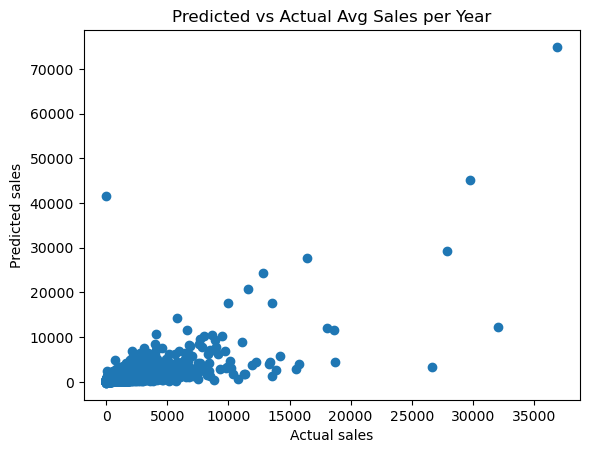

In [58]:
y_pred = mlr.predict(X_test)
plt.scatter(y_test, y_pred)
plt.title("Predicted vs Actual Avg Sales per Year")
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")

In [59]:
train_score = mlr.score(X_train, y_train)
test_score = mlr.score(X_test, y_test)
print("Training Accuracy:", train_score)
print("Testing Accuracy:", test_score)

Training Accuracy: 0.5785652915272606
Testing Accuracy: 0.4627636198658729


In [60]:
print("Coefficients:", pd.Series(mlr.coef_, index=X.columns))

Coefficients: number_of_reviews       378.221568
average_review_score     -0.455306
number_of_items         122.415924
years_in_business       -20.373912
review_sale_ratio       -19.148513
dtype: float64


#### Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

Text(0, 0.5, 'Predicted sales')

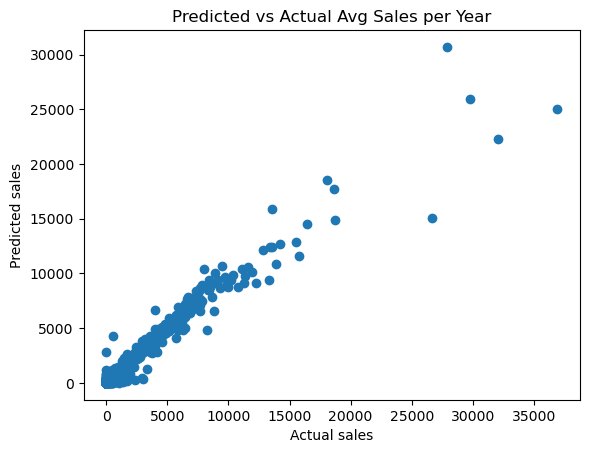

In [62]:
y_pred = rf.predict(X_test)
plt.scatter(y_test, y_pred)
plt.title("Predicted vs Actual Avg Sales per Year")
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")

In [63]:
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
print("Training Accuracy:", train_score)
print("Testing Accuracy:", test_score)

Training Accuracy: 0.9906306649417449
Testing Accuracy: 0.9668615768337502


In [64]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

2024-05-04 02:57:05.291126: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Weight,Feature
8.7352 ± 0.4332,number_of_reviews
1.4944 ± 0.0972,review_sale_ratio
0.7909 ± 0.0510,years_in_business
0.0147 ± 0.0029,number_of_items
0.0085 ± 0.0039,average_review_score


In [65]:
import shap

explainer = shap.TreeExplainer(rf)

In [66]:
random_store = std_X.sample()
print(pd.Series(scaler.inverse_transform(random_store)[0], index=X.columns))
shap_vals = explainer.shap_values(random_store)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_vals, random_store)

number_of_reviews       20.000000
average_review_score     5.000000
number_of_items          0.000000
years_in_business        8.000000
review_sale_ratio        0.689655
dtype: float64


Number of reviews were shown to be the most important indicator of success for shops as suggested by the high mutual information score and supported by the permutation importance test for our highly accurate random forest regression model. The correlation matrix revealed the surprising insight that the number of items a seller has available appears to be have a moderate positive correlation with number of reviews their shop received.

Perhaps unsurprisingly, the average review score for the shop tended to have little impact on the shop's overall success. The average shop review was very high (about 4.9) with a standard deviation of only 0.27 suggesting that customers may be more motivated to leave good reviews making review volume as the more important metric.

We create recommenders using demographic , content- based and collaborative filtering. While demographic filtering is very elemantary and cannot be used practically, Hybrid Systems can take advantage of content-based and collaborative filtering as the two approaches are proved to be almost complimentary. 